<h1><center> Quantitative Finance Bootcamp - Erdos Institute <center></h1>
<h1><center> Mini project 3: Understanding Black-Scholes option pricing </center></h1>
    
    
This project aims to analyze the Black-Scholes model for European call and put options, focusing on how option prices vary with time to expiration and the spot price of the underlying asset.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

# Setting global matplotlib parameters
import matplotlib as mpl
import matplotlib.dates as mdates 
mpl.rcParams["xtick.labelsize"] = 22
mpl.rcParams["ytick.labelsize"] = 22
mpl.rcParams['axes.titlesize'] = 22 
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams["mathtext.fontset"] = 'cm'

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)

### a) Black-Scholes Call option - Time sensitivity

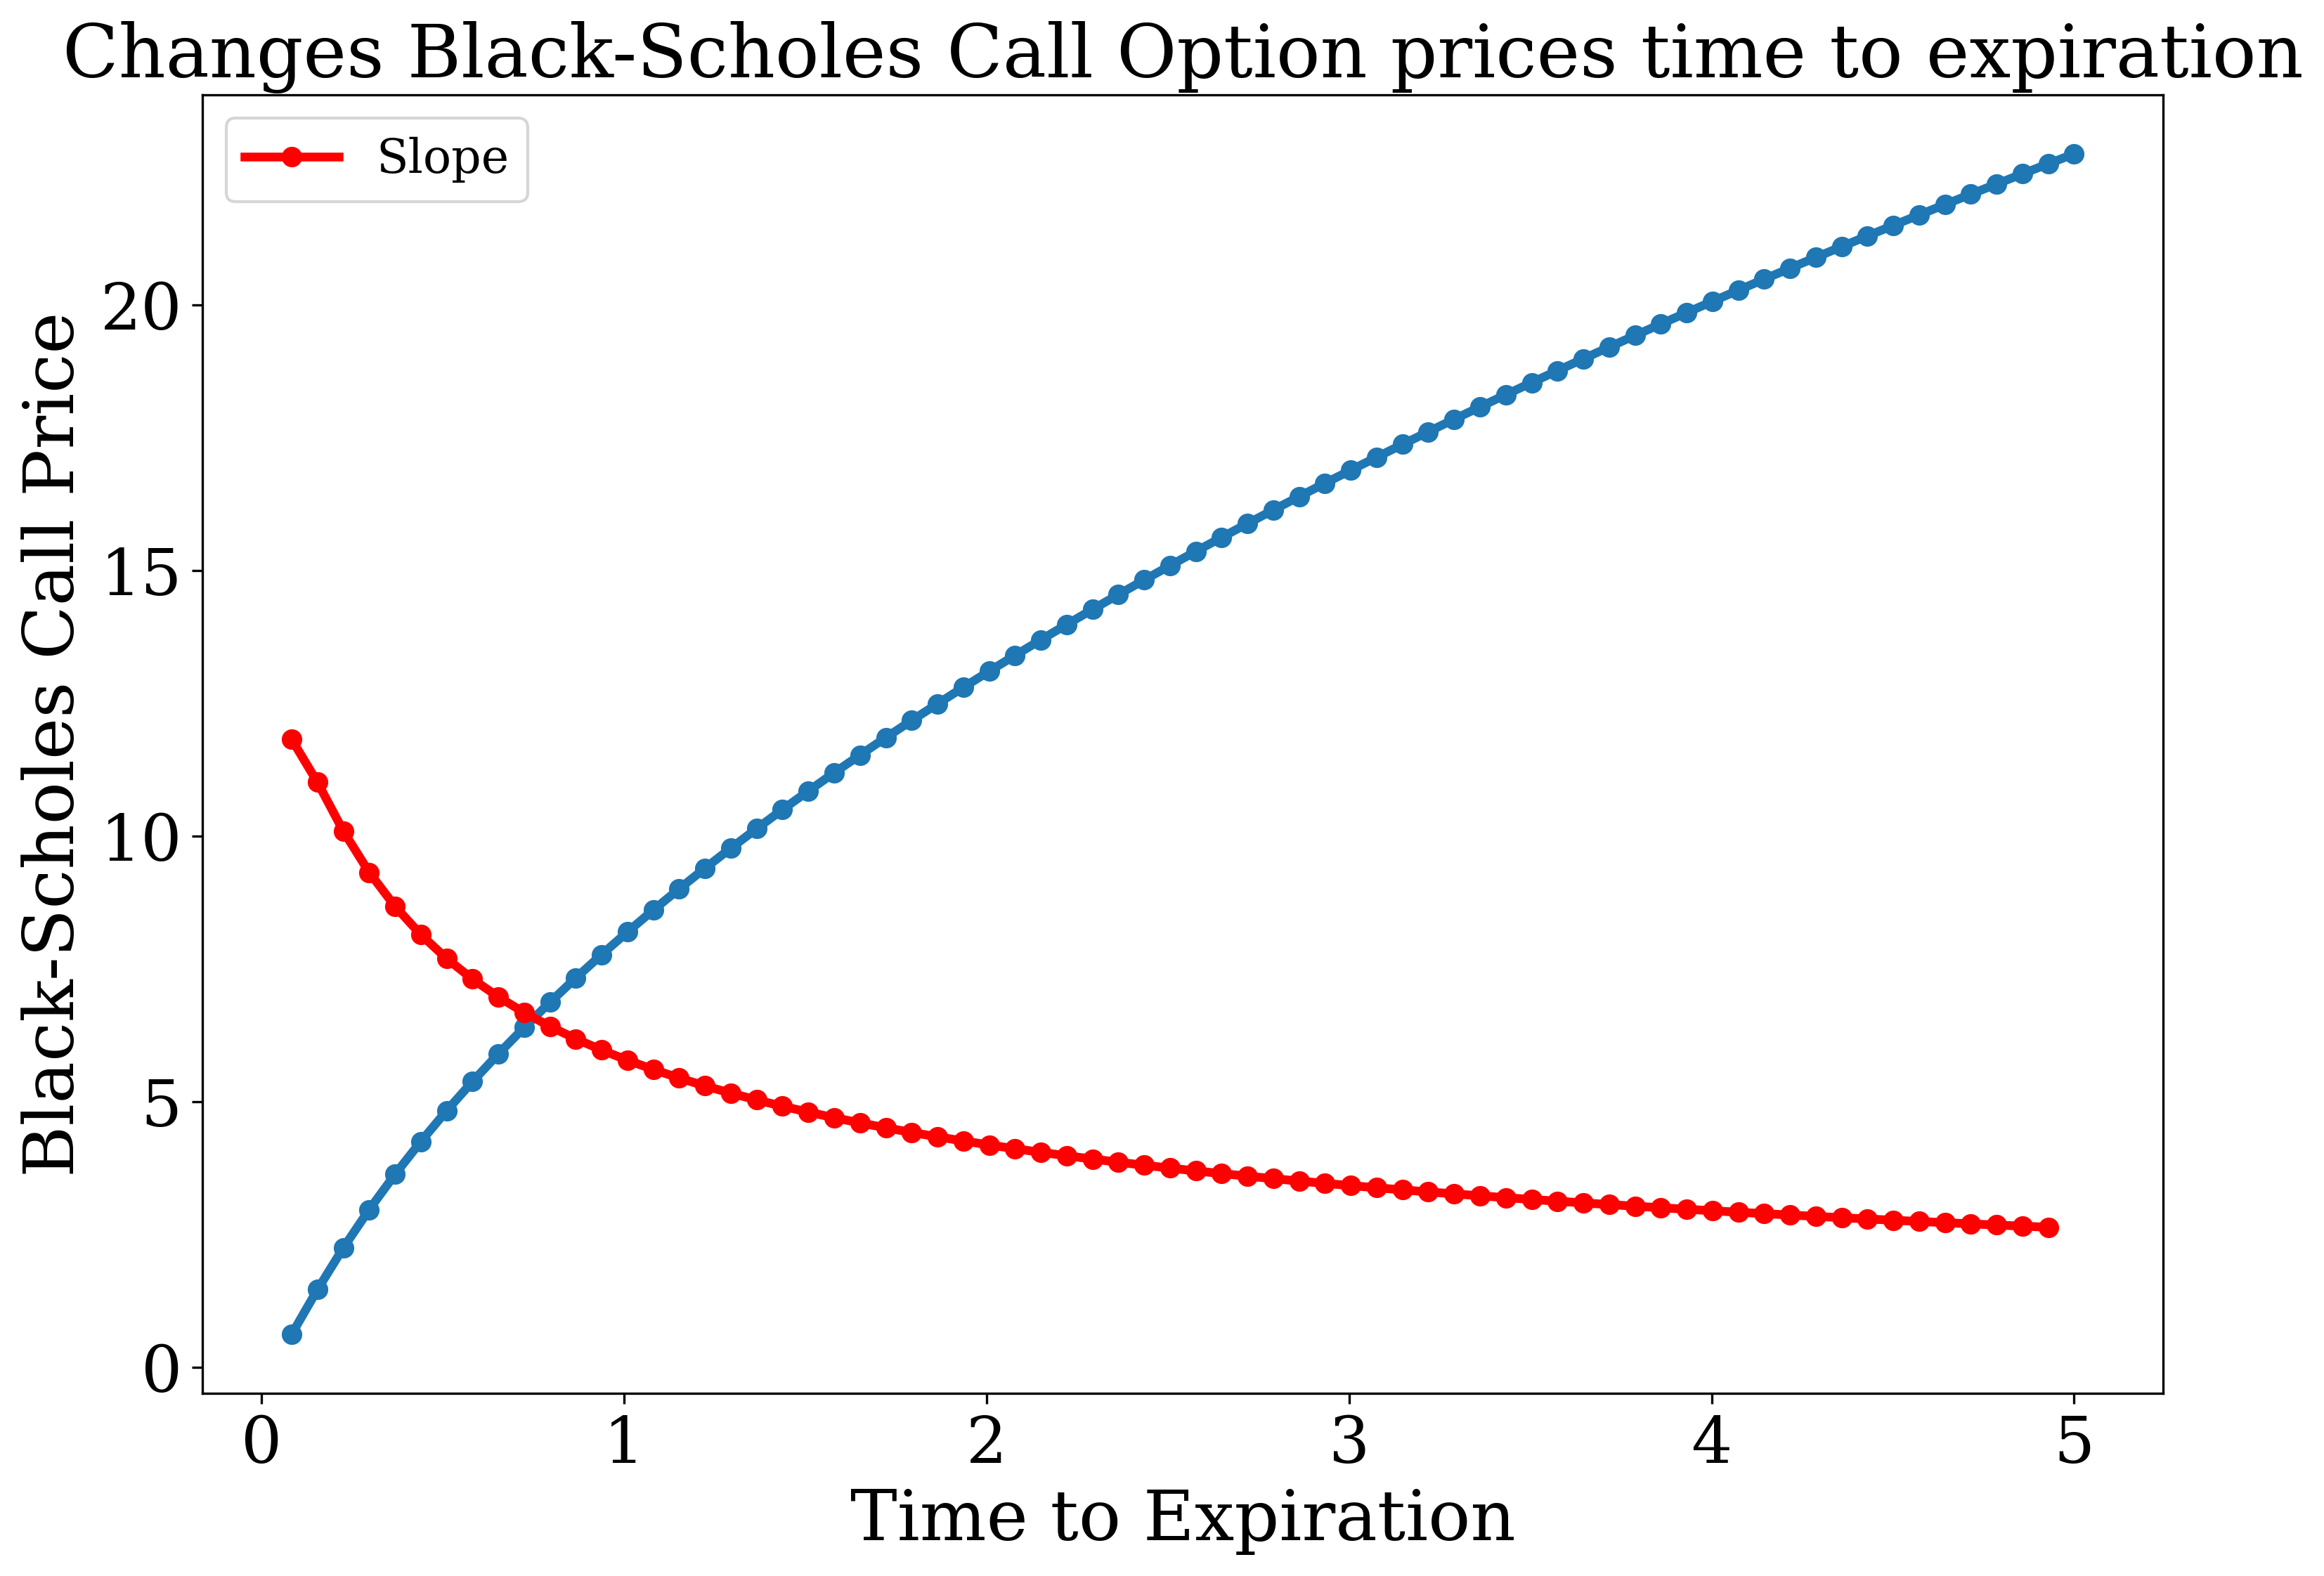

In [15]:
call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]
slope_call_prices = [(call_prices[i] - call_prices[i-1])/(times[i]-times[i-1]) for i in range(1,len(times))]
plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices,'-o',linewidth=3)
plt.plot(times[:-1], slope_call_prices,'-o',linewidth=3,color="r",label="Slope")
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.legend(fontsize=16)
plt.show()

### Observation
From the plot above, we observe that the call option price increases as time to expiration increases. This behavior can be reasoned with the idea that longer time to expiration provides more opportunity for the underlying stock price to exceed the strike price, enhancing the option’s value.
To interpret the rate of change, we consider how the slope of this curve behaves (red curve). The call option price increases at a decreasing rate as time to expiration grows. When time to expiration is small (e.g., near 1/12 years), the price is highly sensitive to changes in time, resulting in a steeper slope. As time to expiration becomes larger (e.g., approaching 5 years), the slope flattens, indicating that additional time has a diminishing impact on the price. This reflects that the option’s time value grows more slowly as expiration is longer.

### b) Black-Scholes call option price - Spot price sensitivity 

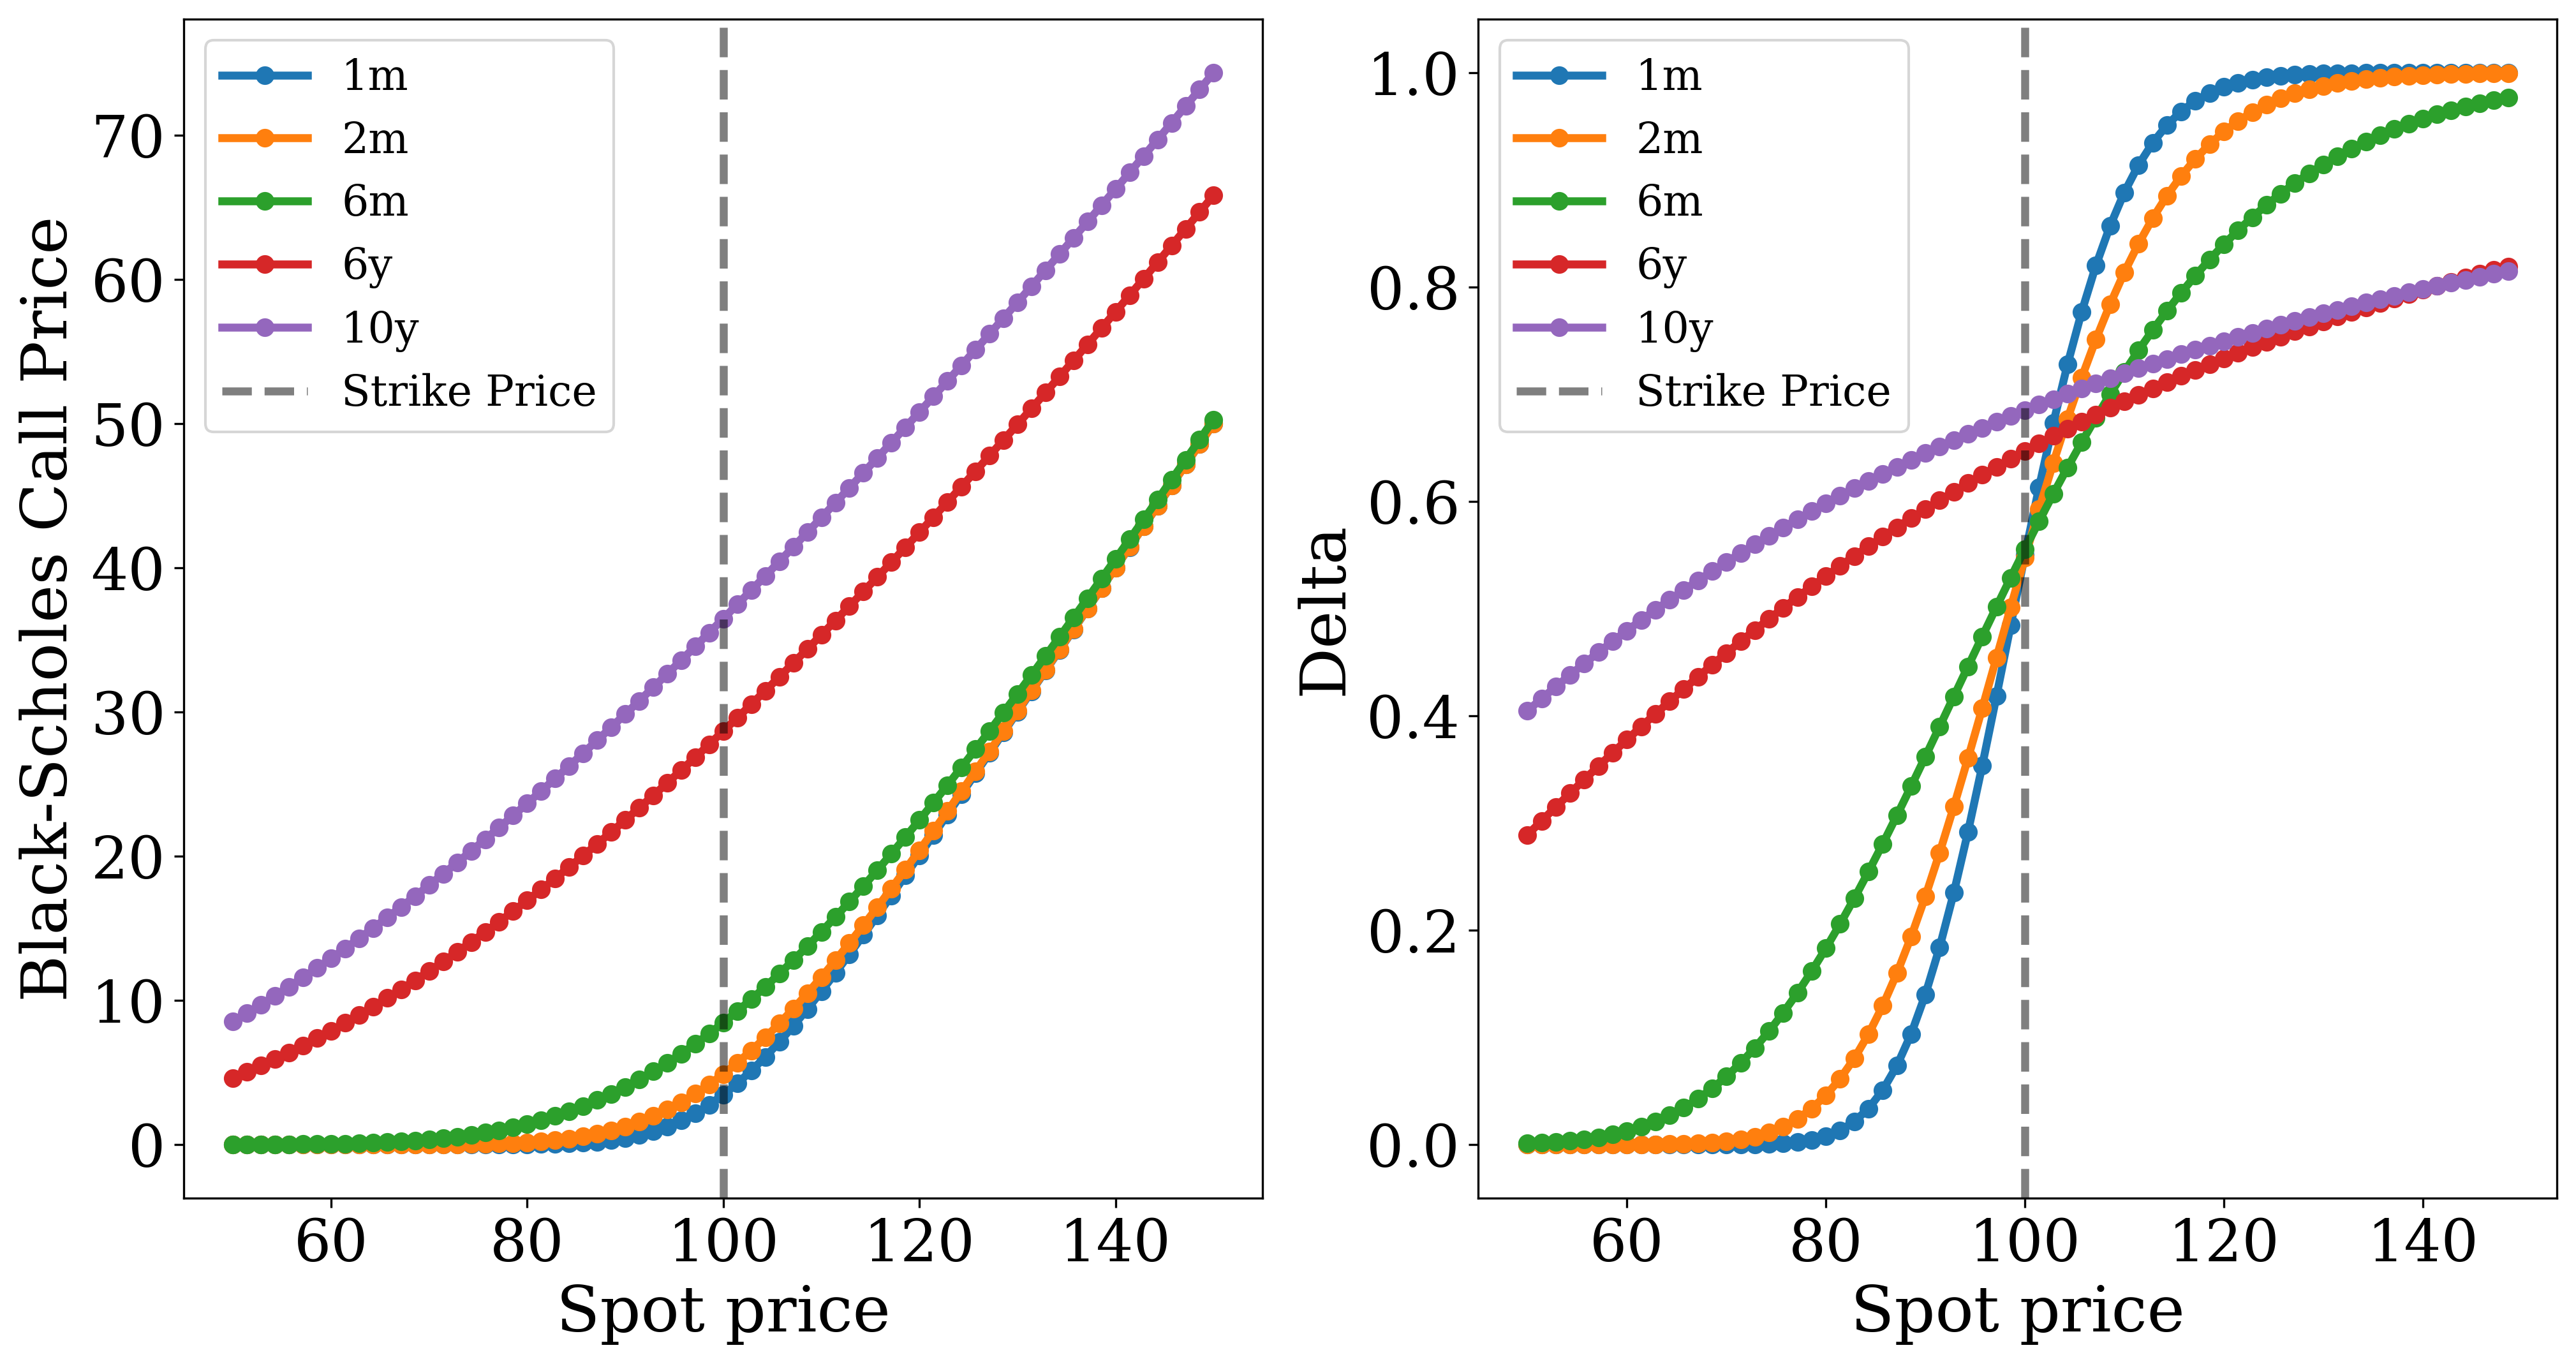

In [70]:
S0_list = np.linspace(50, 150, 71)
time_list = [1/12,1/6,1/2,6,10]
legend_list = ["1m", "2m", "6m", "6y","10y"]

call_pricesvsS0 = [[bs_call(S0=S0_list[i],K=100,sigma=sigma, t=j) for i in range(len(S0_list))] for j in time_list]
Delta = []
for i in range(len(time_list)):
    Delta.append([(call_pricesvsS0[i][j] - call_pricesvsS0[i][j-1])/(S0_list[j]-S0_list[j-1]) for j in range(1,len(S0_list))])

fig,axes = plt.subplots(1,2, figsize = (16,8))

for j in range(len(time_list)):
    axes[0].plot(S0_list, call_pricesvsS0[j],'-o',linewidth=3,label=legend_list[j])
    axes[1].plot(S0_list[:-1], Delta[j],'-o',linewidth=3,label=legend_list[j])
axes[0].set_xlabel('Spot price')
axes[0].set_ylabel('Black-Scholes Call Price')
axes[1].set_xlabel('Spot price')
axes[1].set_ylabel('Delta')
axes[0].axvline(x=100,color='k',linewidth=3,linestyle="--",alpha=0.5,label="Strike Price")
axes[1].axvline(x=100,color='k',linewidth=3,linestyle="--",alpha=0.5,label="Strike Price")
axes[0].legend(fontsize=16)
axes[1].legend(fontsize=16)
plt.show()

### Observation

The plot on the left displays the Black-Scholes call option price as a function of spot price ($S0$) for different times to expiration, while the plot on the right shows the rate of change of the call option price with respect to the spot price, defined as delta ($\Delta$). These plots illustrate how the sensitivity of the call option price to changes in spot price ($S0$) depends on both the spot price relative to the strike price ($K$) and the time to expiration. We can divide our analysis into different time regimes:

**Shorter Expiration Times (1m,2m,6m)**

For short times to expiration, the call option price closely approximates its intrinsic value, $\max(S0-K, 0)$. The delta plot on the right exhibits a sharp, sigmoid-like behavior: it is nearly $0$ when the option is out-of-the-money ($S0 < K$), reflecting low sensitivity to changes in $S0$, and jumps to near $1$ when the option is in-the-money ($S0 > K$), indicating high sensitivity. This rapid crossover occurs around $S0 \approx K$, as the option price transitions abruptly from being nearly worthless to valuable.

**Longer Expiration Times (6y,10y)**

For longer times to expiration, the call option price exceeds its intrinsic value due to the addition of time value, and the delta increases more gradually as $S0$ increases. Instead of a sharp transition, $\Delta$ moves smoothly from near $0$ (when $S0$ is significantly below $K$) to near $1$ (when $S0$ is significantly above $K$). This indicates moderate sensitivity across a wider range of spot prices. Even out-of-the-money options retain some responsiveness due to the potential for future price movements, and in-the-money options do not reach the maximum sensitivity of $\Delta = 1,$ as quickly due to the uncertainty over a longer time period as corroborated by purple and red curve. 

To summarize our observations, in the Black-Scholes framework, as time to expiration decreases, the call option price converges to its intrinsic value, $\max(S0-K, 0)$, because there is less time for additional value to accrue beyond this amount. Consequently, delta becomes more extreme: it approaches $0$ when $S0 < K$ (low sensitivity, as the option is likely to become worthless) and $1$ when $S0 > K$ (high sensitivity, as the option is likely to behave more like the underlying stock), with a sharp transition near $S0 = K$. For longer times to expiration, the presence of time value results in a higher option price and a more gradual change in delta across $S0$. 

Specifically, when $S0 \approx K$, shorter times to expiration result in a larger magnitude of delta ($|\Delta|$), typically around $0.5$, making the option price more responsive to small changes in $S0$. In contrast, for longer times to expiration, $|\Delta|$ is smaller at $S0 = K$ (e.g., around $0.3\sim0.4$), indicating less immediate sensitivity to spot price changes, as the time value cushions the price response. 

### c) Black-Scholes Put option - Time sensitivity

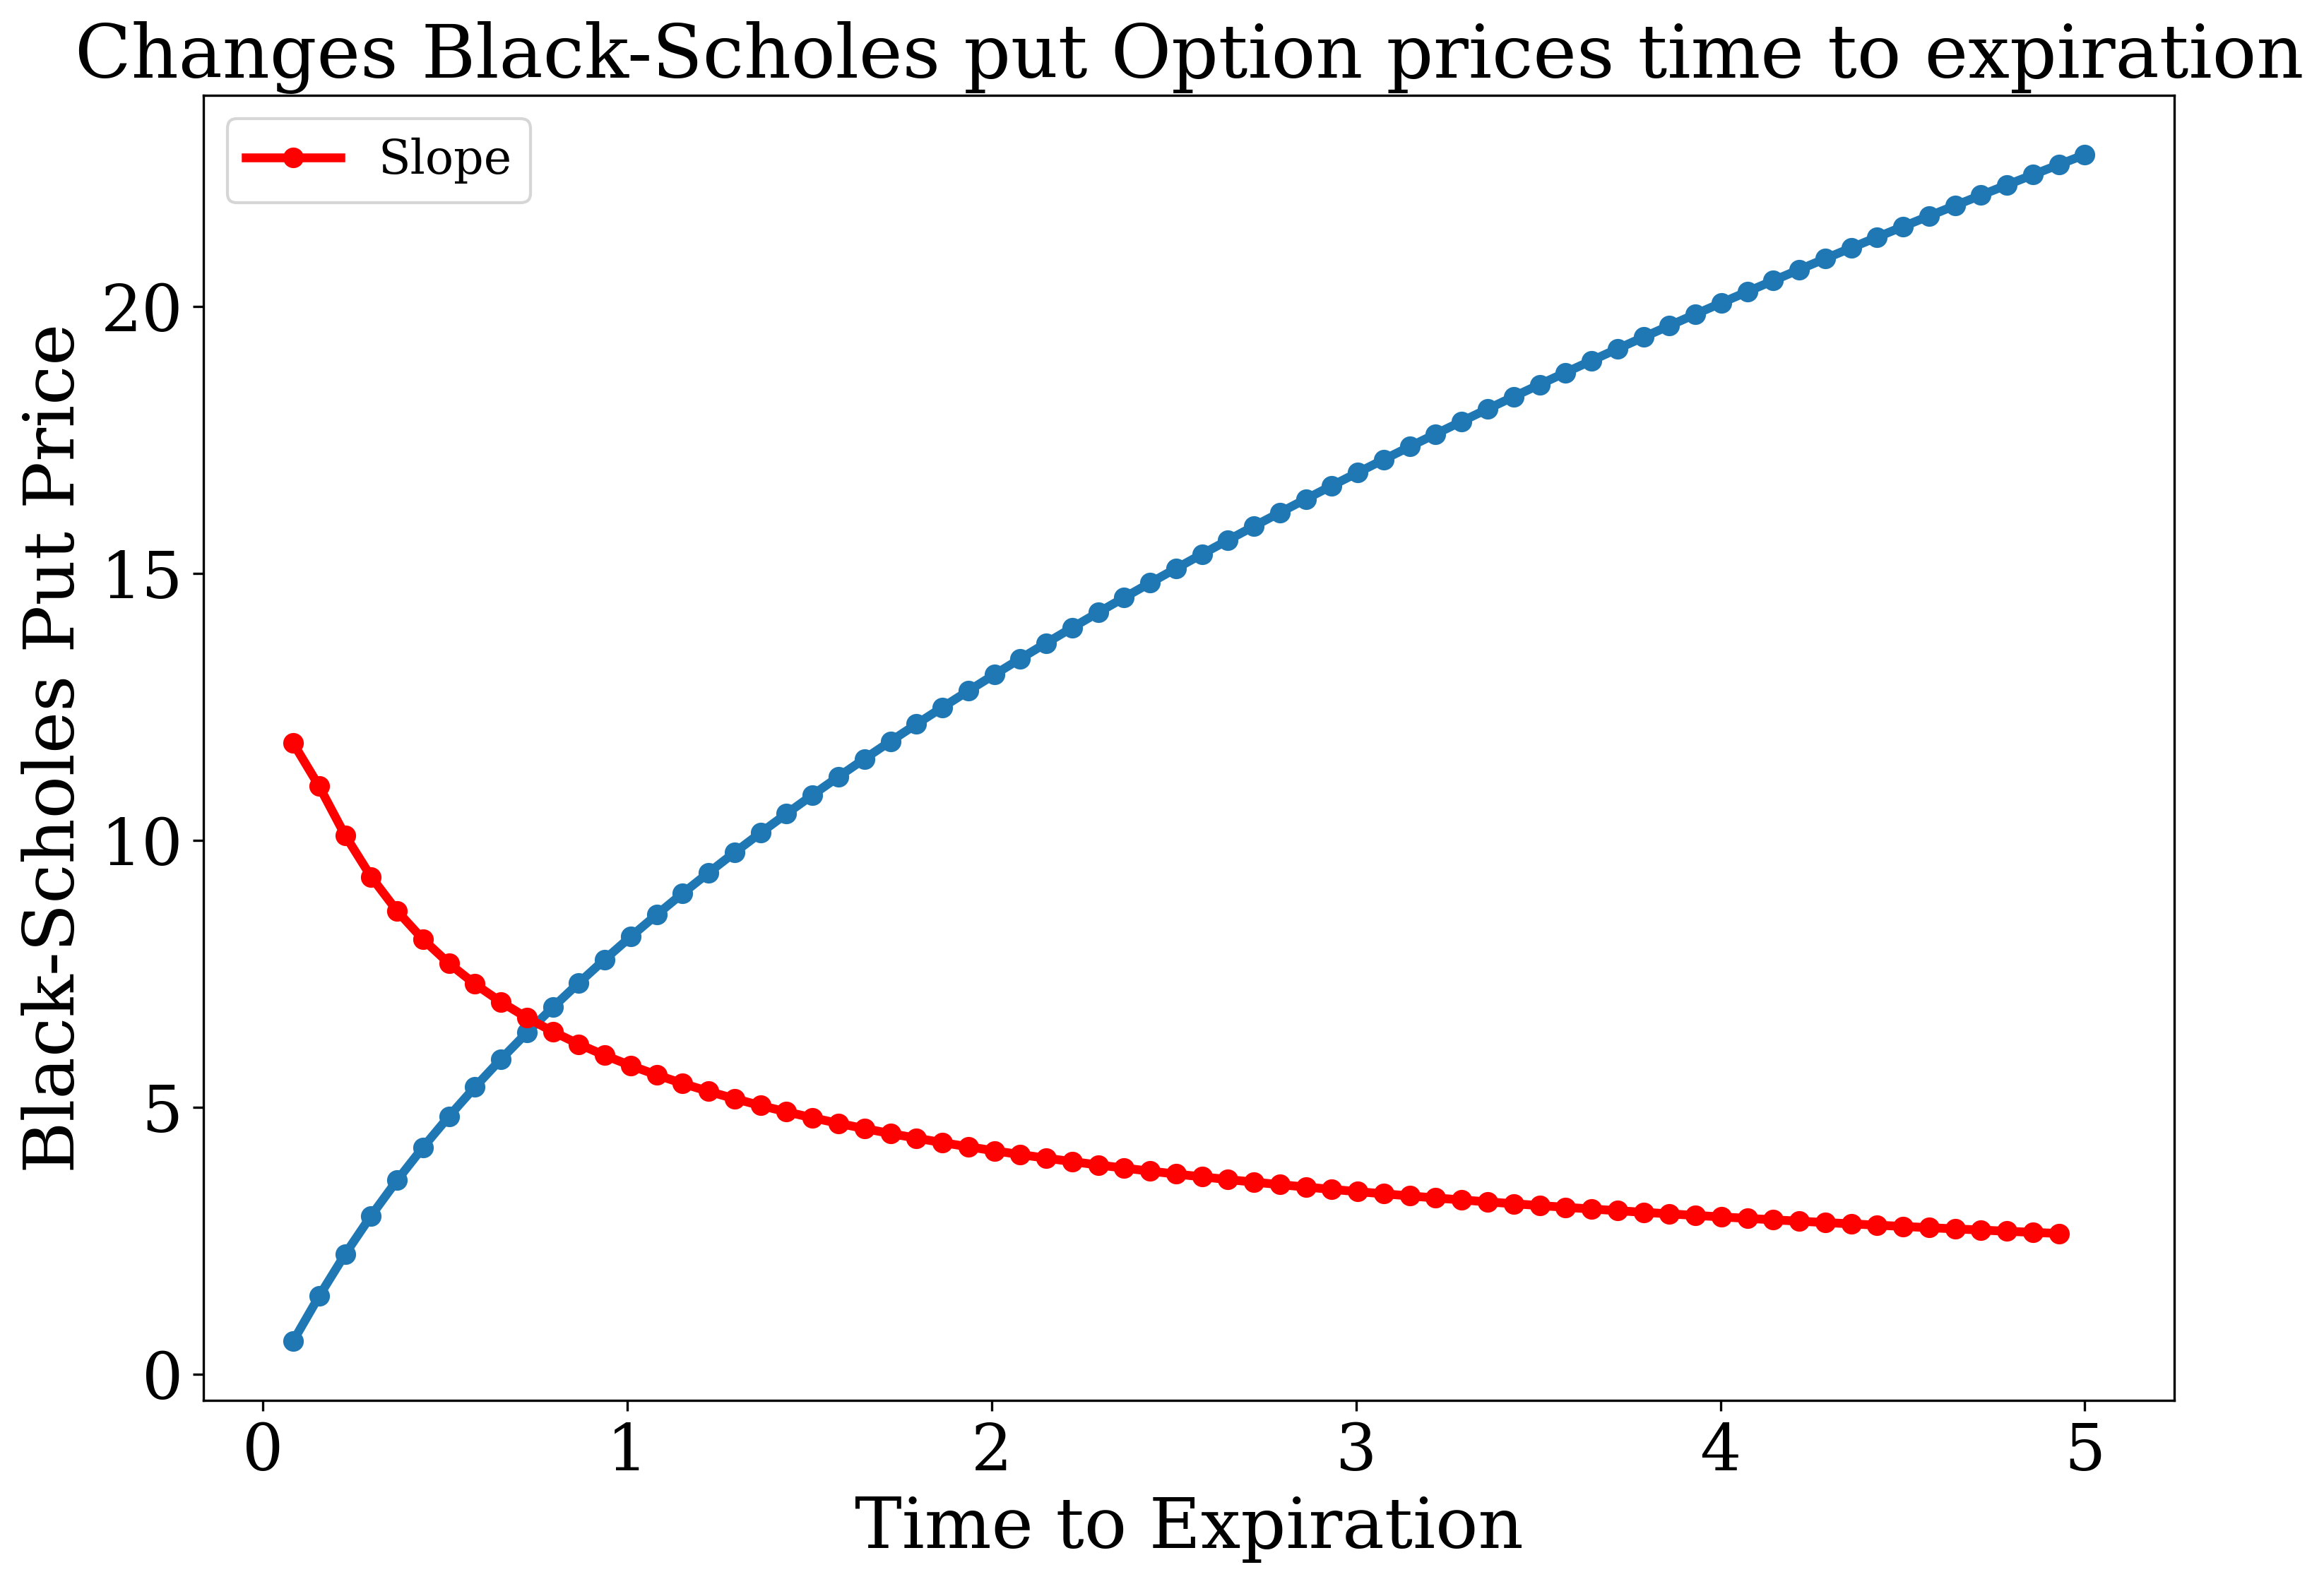

In [54]:
S0 = 110
K = 100
sigma = .3
times = np.linspace(1/12, 5, 70)
put_prices = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]
slope_put_prices = [(put_prices[i] - put_prices[i-1])/(times[i]-times[i-1]) for i in range(1,len(times))]
plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes put Option prices time to expiration', size = 25)
plt.plot(times, put_prices,'-o',linewidth=3)
plt.plot(times[:-1], slope_put_prices,'-o',linewidth=3,color="r",label="Slope")
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Put Price')
plt.legend(fontsize=16)
plt.show()

### Observation

From the plot, we observe that the put option price increases as the time to expiration increases. This behavior aligns with the intuition that a longer time to expiration provides more opportunity for the underlying stock price to fall below the strike price, thereby enhancing the value of the put option.
To understand the rate at which the put option price changes with respect to time to expiration, we examine the slope of the price curve (red curve). The slope indicates how sensitive the put option price is to changes in time to expiration. The put option price increases at a decreasing rate as time to expiration grows. When time to expiration is small (e.g., near 1/12 years), the price is highly sensitive to changes in time, resulting in a steeper slope. As time to expiration becomes larger (e.g., approaching 5 years), the slope flattens, indicating that additional time has a diminishing impact on the price. This reflects that the option’s time value grows more slowly as expiration is longer. 

### d) Black-Scholes put option - Spot price sensitivity

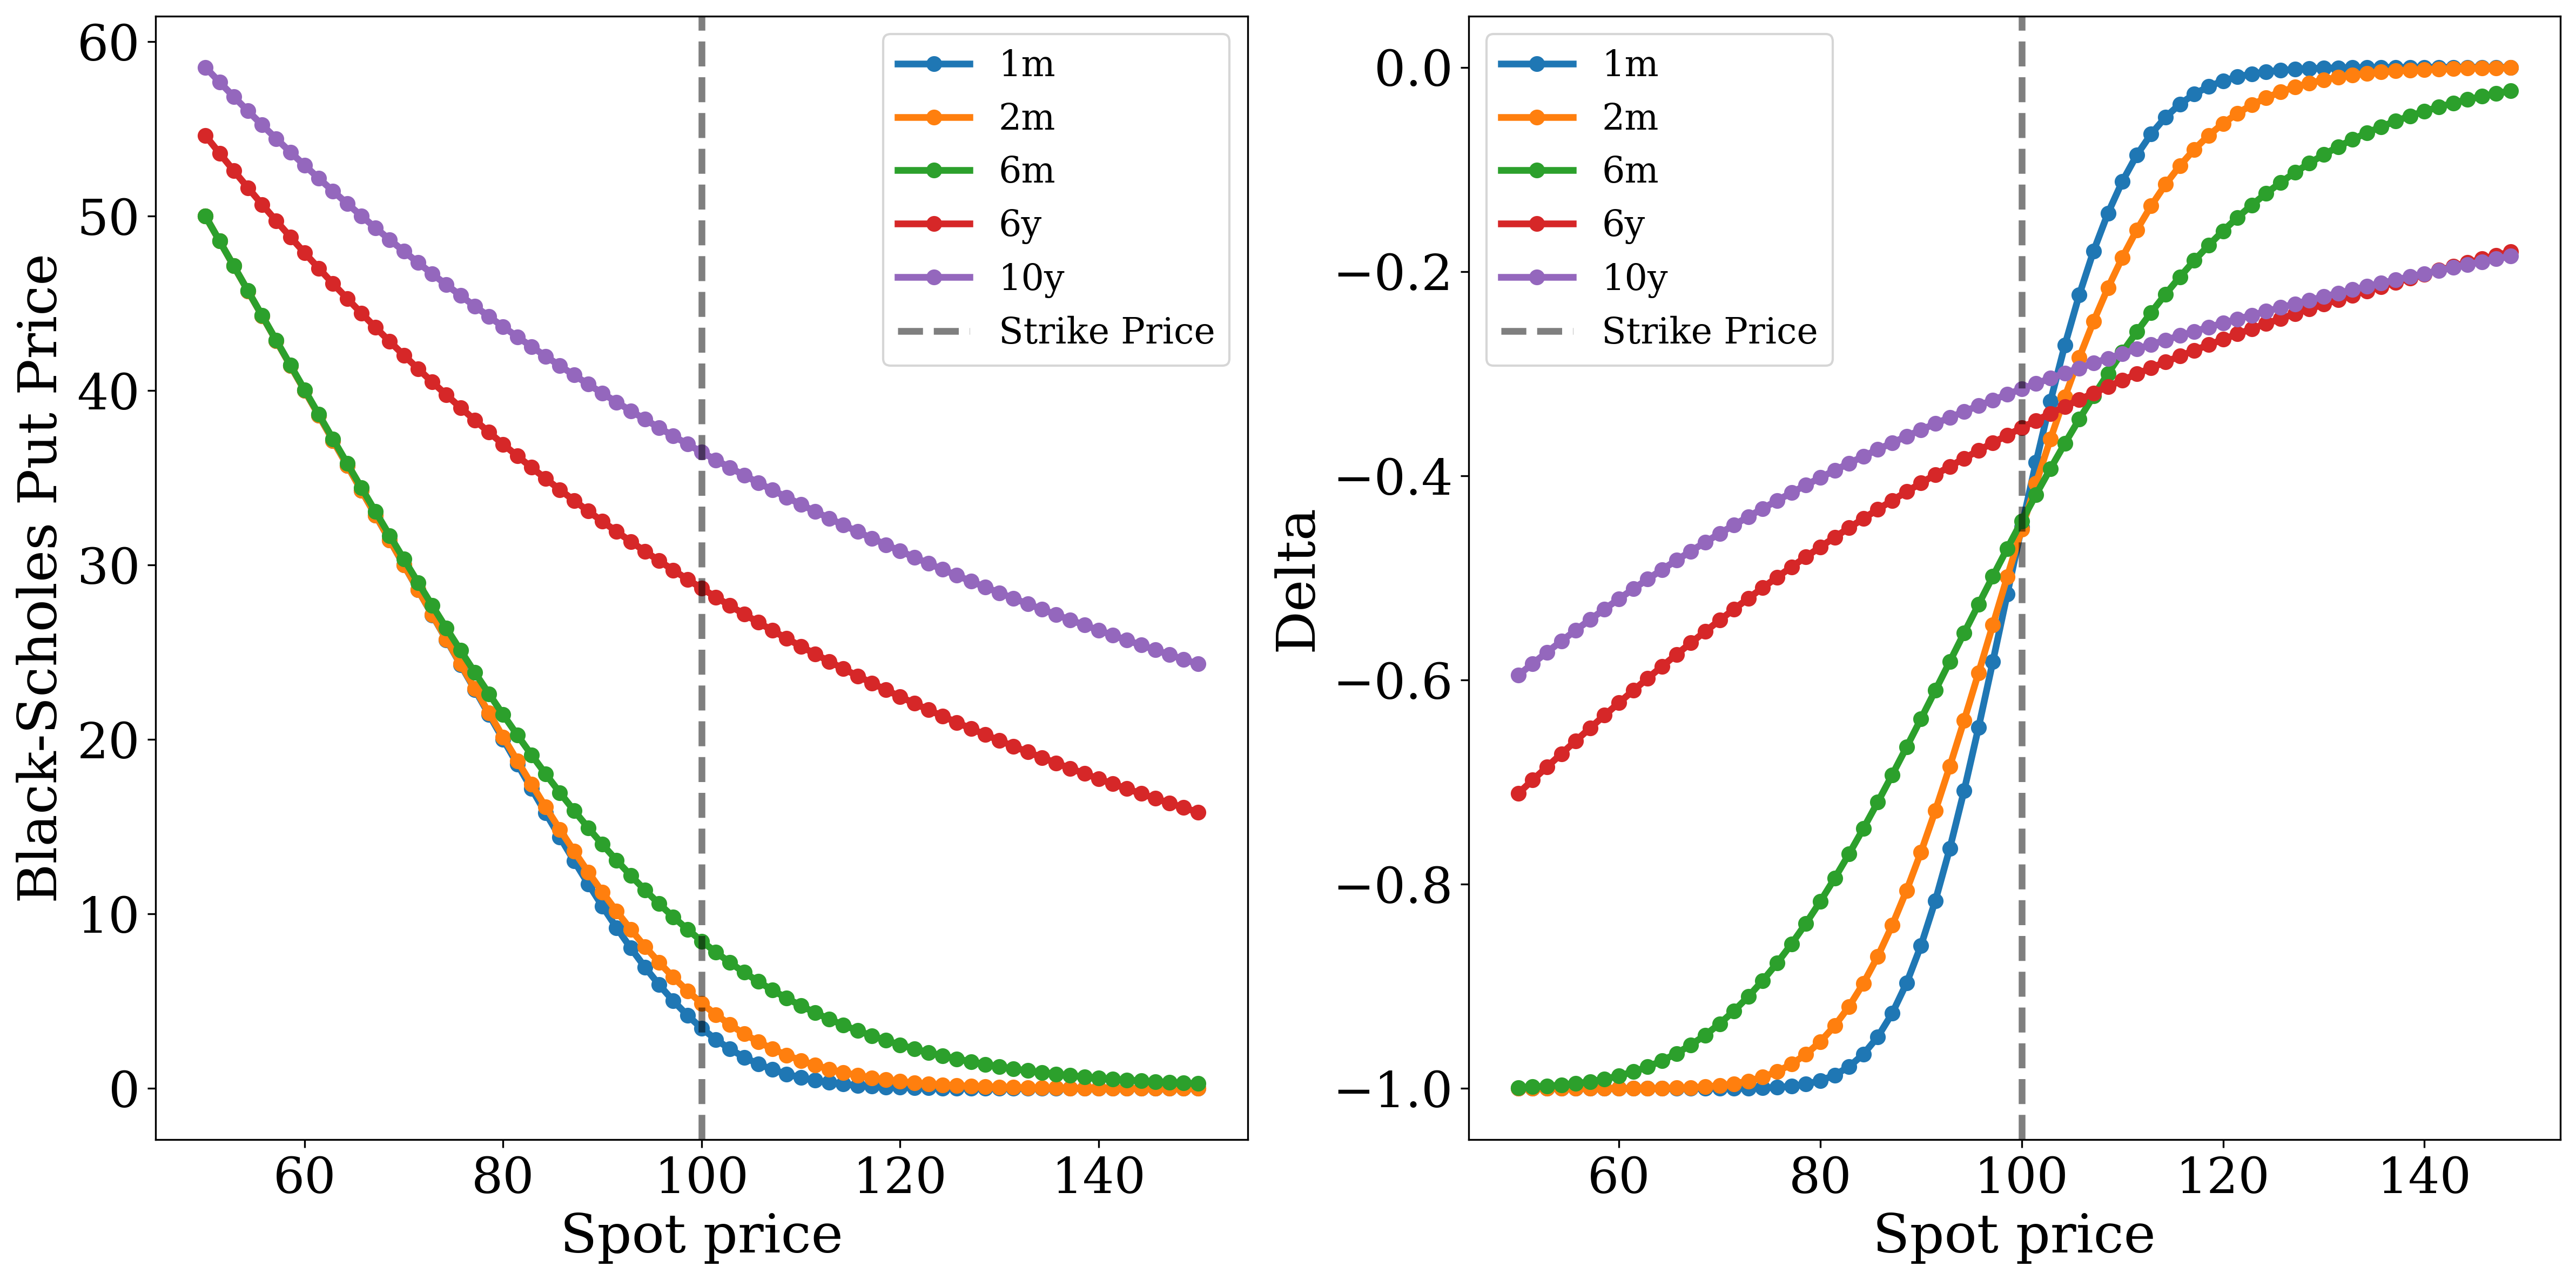

In [69]:
S0_list = np.linspace(50, 150, 71)
time_list = [1/12,1/6,1/2,6,10]
legend_list = ["1m", "2m", "6m", "6y","10y"]

put_pricesvsS0 = [[bs_put(S0=S0_list[i],K=100,sigma=sigma, t=j) for i in range(len(S0_list))] for j in time_list]
Delta = []
for i in range(len(time_list)):
    Delta.append([(put_pricesvsS0[i][j] - put_pricesvsS0[i][j-1])/(S0_list[j]-S0_list[j-1]) for j in range(1,len(S0_list))])

fig,axes = plt.subplots(1,2, figsize = (16,8))

for j in range(len(time_list)):
    axes[0].plot(S0_list, put_pricesvsS0[j],'-o',linewidth=3,label=legend_list[j])
    axes[1].plot(S0_list[:-1], Delta[j],'-o',linewidth=3,label=legend_list[j])
axes[0].set_xlabel('Spot price')
axes[0].set_ylabel('Black-Scholes Put Price')
axes[1].set_xlabel('Spot price')
axes[1].set_ylabel('Delta')
axes[0].axvline(x=100,color='k',linewidth=3,linestyle="--",alpha=0.5,label="Strike Price")
axes[1].axvline(x=100,color='k',linewidth=3,linestyle="--",alpha=0.5,label="Strike Price")
axes[0].legend(fontsize=16)
axes[1].legend(fontsize=16)
plt.tight_layout()
plt.show()

### Observation

The plot on the left displays the Black-Scholes put option price as a function of spot price ($S0$) for different times to expiration, while the plot on the right shows the rate of change of the put option price with respect to the spot price, defined as delta ($\Delta$) again. These plots illustrate how the sensitivity of the put option price to changes in spot price ($S0$) depends on both the spot price relative to the strike price ($K$) and the time to expiration. We do a similar analysis during different time regimes:

**Shorter Expiration Times (1m,2m,6m)**

For short times to expiration, the put option price closely approximates its intrinsic value, $\max(-S0+K, 0)$. The delta plot on the right exhibits a sharp, sigmoid-like behavior: it is nearly $-1$ when the option is in-the-money ($S0 < K$), reflecting high sensitivity to changes in $S0$, and jumps to near $0$ when the option is out-of-the-money ($S0 > K$), indicating low sensitivity. This rapid crossover occurs around $S0 \approx K$, as the option price transitions abruptly from being valuable to nearly worthless.

**Longer Expiration Times (6y,10y)**

For longer times to expiration, the put option price exceeds its intrinsic value due to the addition of time value, and the delta decreases more gradually as $S0$ increases. Instead of a sharp transition, $\Delta$ moves smoothly from near $-1$ (when $S0$ is significantly below $K$) to near $0$ (when $S0$ is significantly above $K$). This indicates moderate sensitivity across a wider range of spot prices. Even out-of-the-money options retain some responsiveness due to the potential for future price movements, and in-the-money options do not reach the maximum sensitivity of $\Delta = -1$ as quickly due to the uncertainty over a longer time period as corroborated by the value purple curve (10y) higher than red curve (6y) at a spot price of 50.

To summarize, in the Black-Scholes framework, as time to expiration decreases, the put option price converges to its intrinsic value, $\max(-S0+K, 0)$, because there is less time for additional value to accrue beyond this amount. Consequently, delta becomes more extreme: it approaches $-1$ when $S0 < K$ (high sensitivity, as the option behaves more like the underlying stock) and $0$ when $S0 > K$ (low sensitivity, as the option is likely to expire worthless), with a sharp transition near $S0 = K$. For longer times to expiration, the presence of time value results in a higher option price and a more gradual change in delta across $S0$.

Specifically, when $S0 \approx K$, shorter times to expiration result in a larger magnitude of delta ($|\Delta|$), typically around $0.5$, making the option price more responsive to small changes in $S0$. In contrast, for longer times to expiration, $|\Delta|$ is smaller at $S0 = K$ (e.g., around $0.3\sim0.4$), indicating less immediate sensitivity to spot price changes, as the time value cushions the price response. 

## Conclusion:

**Option Prices:** Prices for both call and put options rise with longer time to expiration due to increased time value, though the rate of increase slows over extended periods.

**Delta Behavior:** Delta shifts sharply near the strike price for short expiration times, while longer expirations show smoother changes, reflecting broader sensitivity influenced by time value.

**Spot Price Impact:** The effect of spot price on option prices depends on whether the option is in-the-money, at-the-money, or out-of-the-money, with time to expiration amplifying or moderating this effect.

Overall, this mini project provided valuable insights into the dynamics of option pricing and risk management within the Black-Scholes framework.